listing 1 

Epoch:  1000 | SSE: 4.95971e-02 
Epoch:  2000 | SSE: 3.78628e-02 
Epoch:  3000 | SSE: 2.55361e-02 
Epoch:  4000 | SSE: 1.67026e-02 
Epoch:  5000 | SSE: 1.14769e-02 
Epoch:  6000 | SSE: 8.59814e-03 
Epoch:  7000 | SSE: 7.04630e-03 
Epoch:  8000 | SSE: 6.21174e-03 
Epoch:  9000 | SSE: 5.76054e-03 
Epoch: 10000 | SSE: 5.51437e-03 
Epoch: 11000 | SSE: 5.37835e-03 
Epoch: 12000 | SSE: 5.30182e-03 
Epoch: 13000 | SSE: 5.25757e-03 
Epoch: 14000 | SSE: 5.23087e-03 
Epoch: 15000 | SSE: 5.21374e-03 
Epoch: 16000 | SSE: 5.20181e-03 
Epoch: 17000 | SSE: 5.19268e-03 
Epoch: 18000 | SSE: 5.18502e-03 
Epoch: 19000 | SSE: 5.17809e-03 
Epoch: 20000 | SSE: 5.17146e-03 
Epoch: 20000 | SSE: 5.17146e-03 


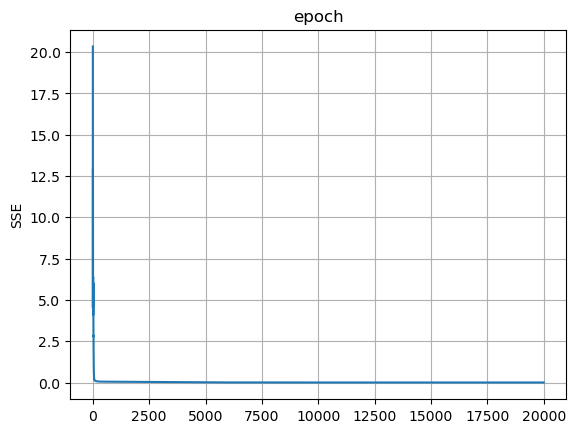

In [35]:
import hickle as hkl
import numpy as np
import nnet as net
import matplotlib.pyplot as plt 

x   = np.array([[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5]])
y_t = np.array([[-0.9602, -0.5770, -0.0729, 0.3771, 0.6405, 0.6600]])
max_epoch = 20000
err_goal = 1e-10 
disp_freq = 1000 
lr = 0.01 
mc = 0.9
L = x.shape[0] 
K1 = 3
K2 = 2

def layer2_momentum(x , y_t,
    max_epoch = 20000,
    err_goal = 1e-10 ,
    disp_freq = 1000 ,
    lr = 0.01 ,
    mc = 0.9,
    L = x.shape[0] ,
    K1 = 3,
    K2 = 2):

   
    SSE_vec = [] 
    # w1, b1 = net.nwtan(K1, L)  
    # w2, b2 = net.rands(K2, K1)
    # hkl.dump([w1,b1,w2,b2], 'wagi2w.hkl')
    w1,b1,w2,b2 = hkl.load('wagi2w.hkl')
    w1_t_1, b1_t_1, w2_t_1, b2_t_1 = w1, b1, w2, b2

    for epoch in range(1, max_epoch+1): 
        y1 = net.tansig( np.dot(w1, x),  b1) 
        y2 = net.purelin(np.dot(w2, y1), b2) 
        e = y_t - y2
        
        d2 = net.deltalin(y2, e)
        d1 = net.deltatan(y1, d2, w2) 
        dw1, db1 = net.learnbp(x,  d1, lr) 
        dw2, db2 = net.learnbp(y1, d2, lr)
        
        w1_temp, b1_temp, w2_temp, b2_temp = \
        w1.copy(), b1.copy(), w2.copy(), b2.copy()
        
        w1 += dw1 + mc * (w1 - w1_t_1)
        b1 += db1 + mc * (b1 - b1_t_1) 
        w2 += dw2 + mc * (w2 - w2_t_1) 
        b2 += db2 + mc * (b2 - b2_t_1) 
        
        w1_t_1, b1_t_1, w2_t_1, b2_t_1 = \
        w1_temp, b1_temp, w2_temp, b2_temp
        
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break

        SSE_vec.append(SSE) 
    
        if SSE < err_goal: 
            break 
        if (epoch % disp_freq) == 0: 
            print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
            # plt.clf()
            # plt.plot(x[0],y_t[0],'r',x[0],y2[0],'g')
            # plt.grid()
            # plt.show()
            # plt.pause(1e-2)

    print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
    hkl.dump([SSE_vec], 'SSE2w_mom.hkl')
            
    plt.plot(SSE_vec) 
    plt.ylabel('SSE') 
    plt.yscale('linear') 
    plt.title('epoch') 
    plt.grid(True) 
    plt.show()
    
# layer2_momentum(x , y_t,
#     max_epoch ,
#     err_goal  ,
#     disp_freq ,
#     lr ,
#     mc ,
#     L ,
#     K1 ,
#     K2 )

Epoch:  1000 | SSE: 7.41970e-03 
Epoch:  2000 | SSE: 6.67692e-03 
Epoch:  3000 | SSE: 6.10873e-03 
Epoch:  4000 | SSE: 5.65803e-03 
Epoch:  5000 | SSE: 5.29311e-03 
Epoch:  6000 | SSE: 4.98822e-03 
Epoch:  7000 | SSE: 4.72541e-03 
Epoch:  8000 | SSE: 4.49311e-03 
Epoch:  9000 | SSE: 4.28394e-03 
Epoch: 10000 | SSE: 4.09299e-03 
Epoch: 11000 | SSE: 3.91683e-03 
Epoch: 12000 | SSE: 3.75299e-03 
Epoch: 13000 | SSE: 3.59963e-03 
Epoch: 14000 | SSE: 3.45538e-03 
Epoch: 15000 | SSE: 3.31926e-03 
Epoch: 16000 | SSE: 3.19054e-03 
Epoch: 17000 | SSE: 3.06871e-03 
Epoch: 18000 | SSE: 2.95345e-03 
Epoch: 19000 | SSE: 2.84456e-03 
Epoch: 20000 | SSE: 2.74192e-03 
Epoch: 20000 | SSE: 2.74192e-03 


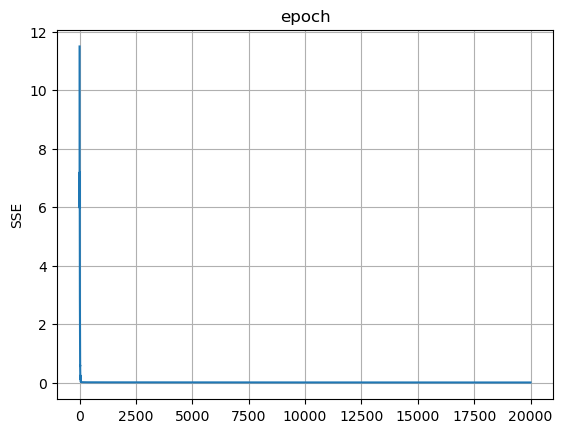

In [37]:
def layer3_momentum(x , y_t,
    max_epoch = 20000,
    err_goal = 1e-10 ,
    disp_freq = 1000 ,
    lr = 0.01 ,
    mc = 0.9,
    L = x.shape[0] ,
    K1 = 3,
    K2 = 2,
    K3 = 2):

    SSE_vec = [] 

    # w1, b1 = net.nwtan(K1, L)  
    # w2, b2 = net.nwtan(K2, K1)  
    # w3, b3 = net.rands(K3, K2)

    # hkl.dump([w1,b1,w2,b2,w3,b3], 'wagi3w.hkl')
    w1,b1,w2,b2 = hkl.load('wagi3w.hkl')
    w1_t_1, b1_t_1, w2_t_1, b2_t_1, w3_t_1, b3_t_1 = w1, b1, w2, b2,w3, b3

    SSE = 0
    lr_vec = list()

    for epoch in range(1, max_epoch+1): 
        y1 = net.tansig( np.dot(w1, x),  b1) 
        y2 = net.tansig( np.dot(w2, y1),  b2) 
        y3 = net.purelin(np.dot(w3, y2), b3) 
        
        e = y_t - y3 
        
        d3 = net.deltalin(y3, e)
        d2 = net.deltatan(y2, d3, w3) 
        d1 = net.deltatan(y1, d2, w2) 

        
        dw1, db1 = net.learnbp(x,  d1, lr) 
        dw2, db2 = net.learnbp(y1, d2, lr)
        dw3, db3 = net.learnbp(y2, d3, lr)
        
        w1_temp, b1_temp, w2_temp, b2_temp, w3_temp, b3_temp = \
        w1.copy(), b1.copy(), w2.copy(), b2.copy() , w3.copy(), b3.copy()
        
        w1 += dw1 + mc * (w1 - w1_t_1)
        b1 += db1 + mc * (b1 - b1_t_1) 
        w2 += dw2 + mc * (w2 - w2_t_1) 
        b2 += db2 + mc * (b2 - b2_t_1)
        w3 += dw3 + mc * (w3 - w3_t_1) 
        b3 += db3 + mc * (b3 - b3_t_1)  
        
        w1_t_1, b1_t_1, w2_t_1, b2_t_1, w3_t_1, b3_t_1 = \
        w1_temp, b1_temp, w2_temp, b2_temp,w3_temp, b3_temp
        
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break

        SSE_vec.append(SSE)
    
        if SSE < err_goal: 
            break 
        if (epoch % disp_freq) == 0:
            print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
            """
            plt.clf()
            plt.plot(x[0],y_t[0],'r',x[0],y2[0],'g')
            plt.grid()
            plt.show()
            plt.pause(1e-2)
            """
    print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
    hkl.dump([SSE_vec], 'SSE2w_adapt.hkl')
                
    plt.plot(SSE_vec) 
    plt.ylabel('SSE') 
    plt.yscale('linear') 
    plt.title('epoch') 
    plt.grid(True) 
    plt.show()
    
layer3_momentum(x , y_t,
    max_epoch ,
    err_goal  ,
    disp_freq ,
    lr ,
    mc ,
    L ,
    K1 ,
    K2 ,
    K3=3)

listing 3

Epoch:  1000 | SSE: 4.89063e-02 
Epoch:  2000 | SSE: 4.11030e-02 
Epoch:  3000 | SSE: 3.12526e-02 
Epoch:  4000 | SSE: 2.26913e-02 
Epoch:  5000 | SSE: 2.11846e-02 
Epoch:  6000 | SSE: 1.29393e-02 
Epoch:  7000 | SSE: 1.03921e-02 
Epoch:  8000 | SSE: 8.26838e-03 
Epoch:  9000 | SSE: 7.09481e-03 
Epoch: 10000 | SSE: 6.52894e-03 
Epoch: 11000 | SSE: 6.02132e-03 
Epoch: 12000 | SSE: 5.68931e-03 
Epoch: 13000 | SSE: 5.94888e-03 
Epoch: 14000 | SSE: 5.93320e-03 
Epoch: 15000 | SSE: 5.43145e-03 
Epoch: 16000 | SSE: 5.31228e-03 
Epoch: 17000 | SSE: 6.37165e-03 
Epoch: 18000 | SSE: 5.70606e-03 
Epoch: 19000 | SSE: 5.35701e-03 
Epoch: 20000 | SSE: 5.25066e-03 
Epoch: 20000 | SSE: 5.25066e-03 


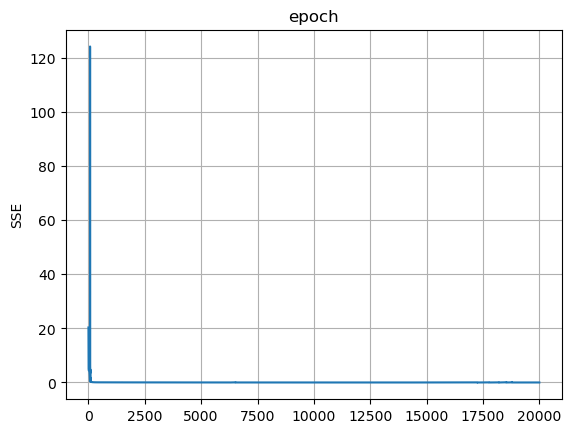

In [38]:

def layer2_adapt(x, y_t,
max_epoch = 20000,
err_goal = 1e-10 ,
disp_freq = 1000 ,
lr = 0.01 ,
ksi_inc = 1.05,
ksi_dec = 0.7,
er = 1.04,
L = x.shape[0] ,
K1 = 3,
K2 = y_t.shape[0] 
):
    SSE_vec = [] 
    # w1, b1 = net.nwtan(K1, L)  
    # w2, b2 = net.rands(K2, K1)
    # hkl.dump([w1,b1,w2,b2], 'wagi2w.hkl')
    w1,b1,w2,b2 = hkl.load('wagi2w.hkl')

    SSE = 0
    lr_vec = list()

    for epoch in range(1, max_epoch+1): 
        y1 = net.tansig( np.dot(w1, x),  b1) 
        y2 = net.purelin(np.dot(w2, y1), b2) 
        e = y_t - y2 

        SSE_t_1 = SSE
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break
        else:
            if SSE > er * SSE_t_1:
                lr *= ksi_dec
            elif SSE < SSE_t_1:
                lr *= ksi_inc
        lr_vec.append(lr)
        
        d2 = net.deltalin(y2, e)
        d1 = net.deltatan(y1, d2, w2) 
        dw1, db1 = net.learnbp(x,  d1, lr) 
        dw2, db2 = net.learnbp(y1, d2, lr)
        
        w1 += dw1
        b1 += db1
        w2 += dw2
        b2 += db2
        
        SSE_vec.append(SSE) 
    
        if SSE < err_goal: 
            break 
        if (epoch % disp_freq) == 0:
            print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
            """
            plt.clf()
            plt.plot(x[0],y_t[0],'r',x[0],y2[0],'g')
            plt.grid()
            plt.show()
            plt.pause(1e-2)
            """
    print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
    hkl.dump([SSE_vec], 'SSE2w_adapt.hkl')
            
    plt.plot(SSE_vec) 
    plt.ylabel('SSE') 
    plt.yscale('linear') 
    plt.title('epoch') 
    plt.grid(True) 
    plt.show()
layer2_adapt(x, y_t)


Epoch:  1000 | SSE: 1.70801e-02 
Epoch:  2000 | SSE: 9.85486e-03 
Epoch:  3000 | SSE: 1.17465e-02 
Epoch:  4000 | SSE: 8.84446e-03 
Epoch:  5000 | SSE: 8.00291e-03 
Epoch:  6000 | SSE: 7.89895e-03 
Epoch:  7000 | SSE: 2.51111e-02 
Epoch:  8000 | SSE: 1.32067e-02 
Epoch:  9000 | SSE: 7.25060e-03 
Epoch: 10000 | SSE: 2.68527e-02 
Epoch: 11000 | SSE: 8.72899e-03 
Epoch: 12000 | SSE: 6.92432e-03 
Epoch: 13000 | SSE: 1.15740e-02 
Epoch: 14000 | SSE: 6.73583e-03 
Epoch: 15000 | SSE: 6.48020e-03 
Epoch: 16000 | SSE: 3.51801e-02 
Epoch: 17000 | SSE: 2.01267e-02 
Epoch: 18000 | SSE: 6.11752e-03 
Epoch: 19000 | SSE: 1.82045e-02 
Epoch: 20000 | SSE: 5.93533e-03 
Epoch: 20000 | SSE: 5.93533e-03 


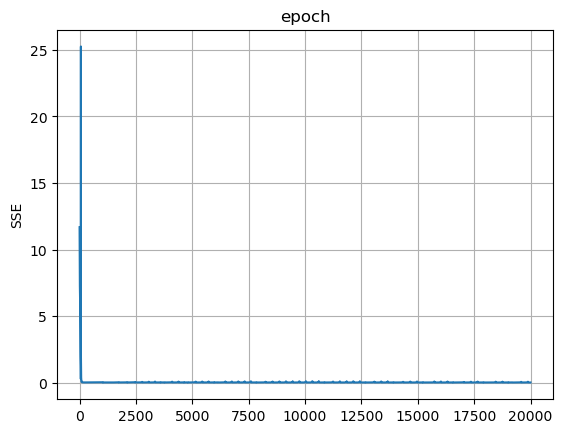

In [39]:


x   = np.array([[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5]])
y_t = np.array([[-0.9602, -0.5770, -0.0729, 0.3771, 0.6405, 0.6600]])

def layer3_adapt(x, y_t,
max_epoch = 20000,
err_goal = 1e-10 ,
disp_freq = 1000 ,
lr = 0.01 ,
ksi_inc = 1.05,
ksi_dec = 0.7,
er = 1.04,
L = x.shape[0] ,
K1 = 3,
K2 = y_t.shape[0],
K3=3 
):
    SSE_vec = [] 

    w1, b1 = net.nwtan(K1, L)  
    w2, b2 = net.nwtan(K2, K1)  
    w3, b3 = net.rands(K3, K2)

    hkl.dump([w1,b1,w2,b2,w3,b3], 'wagi2w3.hkl')
    #w1,b1,w2,b2 = hkl.load('wagi3w.hkl')

    SSE = 0
    lr_vec = list()

    for epoch in range(1, max_epoch+1): 
        y1 = net.tansig( np.dot(w1, x),  b1) 
        y2 = net.tansig( np.dot(w2, y1),  b2) 
        y3 = net.purelin(np.dot(w3, y2), b3) 
        
        e = y_t - y3 

        SSE_t_1 = SSE
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break
        else:
            if SSE > er * SSE_t_1:
                lr *= ksi_dec
            elif SSE < SSE_t_1:
                lr *= ksi_inc
        lr_vec.append(lr)
        
        d3 = net.deltalin(y3, e)
        d2 = net.deltatan(y2, d3, w3) 
        d1 = net.deltatan(y1, d2, w2) 

        
        dw1, db1 = net.learnbp(x,  d1, lr) 
        dw2, db2 = net.learnbp(y1, d2, lr)
        dw3, db3 = net.learnbp(y2, d3, lr)
        
        
        
        
        w1 += dw1
        b1 += db1
        w2 += dw2
        b2 += db2
        w3 += dw3
        b3 += db3
        
        SSE_vec.append(SSE) 
    
        if SSE < err_goal: 
            break 
        if (epoch % disp_freq) == 0:
            print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
            """
            plt.clf()
            plt.plot(x[0],y_t[0],'r',x[0],y2[0],'g')
            plt.grid()
            plt.show()
            plt.pause(1e-2)
            """
    print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
    hkl.dump([SSE_vec], 'SSE2w_adapt.hkl')
            
    plt.plot(SSE_vec) 
    plt.ylabel('SSE') 
    plt.yscale('linear') 
    plt.title('epoch') 
    plt.grid(True) 
    plt.show()
    
layer3_adapt(x, y_t)

Epoch:  1000 | SSE: 1.72092e-02 
Epoch:  2000 | SSE: 5.45318e-03 
Epoch:  3000 | SSE: 5.14586e-03 
Epoch:  4000 | SSE: 5.04983e-03 
Epoch:  5000 | SSE: 5.68635e-03 
Epoch:  6000 | SSE: 4.27756e-03 
Epoch:  7000 | SSE: 1.98389e-03 
Epoch:  8000 | SSE: 9.93446e-04 
Epoch:  9000 | SSE: 5.23422e-04 
Epoch: 10000 | SSE: 4.18564e-04 
Epoch: 11000 | SSE: 2.10834e-04 
Epoch: 12000 | SSE: 1.49322e-04 
Epoch: 13000 | SSE: 1.13056e-04 
Epoch: 14000 | SSE: 9.15633e-05 
Epoch: 15000 | SSE: 7.87004e-05 
Epoch: 16000 | SSE: 7.27600e-05 
Epoch: 17000 | SSE: 6.51608e-05 
Epoch: 18000 | SSE: 6.16994e-05 
Epoch: 19000 | SSE: 5.94297e-05 
Epoch: 20000 | SSE: 5.77036e-05 
Epoch: 20000 | SSE: 5.77036e-05 


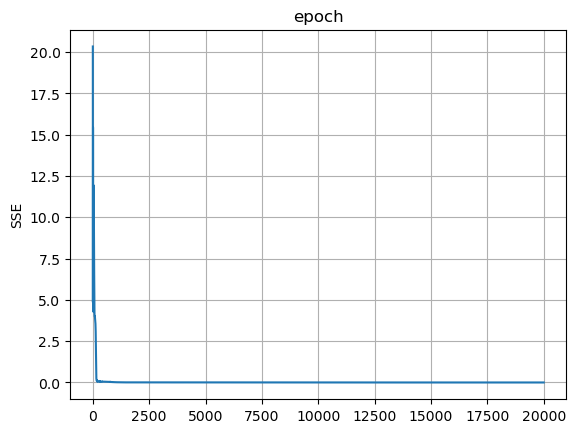

In [41]:
def layer2_momentum_adapt(x , y_t,
    max_epoch = 20000,
    err_goal = 1e-10 ,
    disp_freq = 1000 ,
    lr = 0.01 ,
    mc = 0.9,
    ksi_inc = 1.05,
    ksi_dec = 0.7,
    L = x.shape[0] ,
    K1 = 3,
    K2 = 2):

   
    SSE_vec = [] 
    # w1, b1 = net.nwtan(K1, L)  
    # w2, b2 = net.rands(K2, K1)
    # hkl.dump([w1,b1,w2,b2], 'wagi2w.hkl')
    w1,b1,w2,b2 = hkl.load('wagi2w.hkl')
    w1_t_1, b1_t_1, w2_t_1, b2_t_1 = w1, b1, w2, b2
    
    lr_vec = list()
    SSE = 0

    for epoch in range(1, max_epoch+1): 
        y1 = net.tansig( np.dot(w1, x),  b1) 
        y2 = net.purelin(np.dot(w2, y1), b2) 
        e = y_t - y2
        
        SSE_t_1 = SSE
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break
        else:
            if SSE > er * SSE_t_1:
                lr *= ksi_dec
            elif SSE < SSE_t_1:
                lr *= ksi_inc
        lr_vec.append(lr)
        
        
        d2 = net.deltalin(y2, e)
        d1 = net.deltatan(y1, d2, w2) 
        dw1, db1 = net.learnbp(x,  d1, lr) 
        dw2, db2 = net.learnbp(y1, d2, lr)
        
        w1_temp, b1_temp, w2_temp, b2_temp = \
        w1.copy(), b1.copy(), w2.copy(), b2.copy()
        
        w1 += dw1 + mc * (w1 - w1_t_1)
        b1 += db1 + mc * (b1 - b1_t_1) 
        w2 += dw2 + mc * (w2 - w2_t_1) 
        b2 += db2 + mc * (b2 - b2_t_1) 
        
        w1_t_1, b1_t_1, w2_t_1, b2_t_1 = \
        w1_temp, b1_temp, w2_temp, b2_temp
        
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break

        SSE_vec.append(SSE) 
    
        if SSE < err_goal: 
            break 
        if (epoch % disp_freq) == 0: 
            print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
            # plt.clf()
            # plt.plot(x[0],y_t[0],'r',x[0],y2[0],'g')
            # plt.grid()
            # plt.show()
            # plt.pause(1e-2)

    print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
    hkl.dump([SSE_vec], 'SSE2w_mom.hkl')
            
    plt.plot(SSE_vec) 
    plt.ylabel('SSE') 
    plt.yscale('linear') 
    plt.title('epoch') 
    plt.grid(True) 
    plt.show()
    
layer2_momentum_adapt(x , y_t)

In [47]:
def layer3_momentum_adapt(x , y_t,
    max_epoch = 20000,
    err_goal = 1e-10 ,
    disp_freq = 1000 ,
    lr = 0.01 ,
    mc = 0.9,
    ksi_inc = 1.05,
    ksi_dec = 0.7,
    L = x.shape[0] ,
    K1 = 3,
    K2 = 2,
    K3 = 2):

    SSE_vec = [] 

    # w1, b1 = net.nwtan(K1, L)  
    # w2, b2 = net.nwtan(K2, K1)  
    # w3, b3 = net.rands(K3, K2)

    # hkl.dump([w1,b1,w2,b2,w3,b3], 'wagi3w.hkl')
    w1,b1,w2,b2 = hkl.load('wagi3w.hkl')
    w1_t_1, b1_t_1, w2_t_1, b2_t_1, w3_t_1, b3_t_1 = w1, b1, w2, b2,w3, b3

    SSE = 0
    lr_vec = list()

    for epoch in range(1, max_epoch+1): 
        y1 = net.tansig( np.dot(w1, x),  b1) 
        y2 = net.tansig( np.dot(w2, y1),  b2) 
        y3 = net.purelin(np.dot(w3, y2), b3) 
        
        e = y_t - y3 
        
        
        SSE_t_1 = SSE
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break
        else:
            if SSE > er * SSE_t_1:
                lr *= ksi_dec
            elif SSE < SSE_t_1:
                lr *= ksi_inc
        lr_vec.append(lr)
        
        
        d3 = net.deltalin(y3, e)
        d2 = net.deltatan(y2, d3, w3) 
        d1 = net.deltatan(y1, d2, w2) 

        
        dw1, db1 = net.learnbp(x,  d1, lr) 
        dw2, db2 = net.learnbp(y1, d2, lr)
        dw3, db3 = net.learnbp(y2, d3, lr)
        
        w1_temp, b1_temp, w2_temp, b2_temp, w3_temp, b3_temp = \
        w1.copy(), b1.copy(), w2.copy(), b2.copy() , w3.copy(), b3.copy()
        
        w1 += dw1 + mc * (w1 - w1_t_1)
        b1 += db1 + mc * (b1 - b1_t_1) 
        w2 += dw2 + mc * (w2 - w2_t_1) 
        b2 += db2 + mc * (b2 - b2_t_1)
        w3 += dw3 + mc * (w3 - w3_t_1) 
        b3 += db3 + mc * (b3 - b3_t_1)  
        
        w1_t_1, b1_t_1, w2_t_1, b2_t_1, w3_t_1, b3_t_1 = \
        w1_temp, b1_temp, w2_temp, b2_temp,w3_temp, b3_temp
        
        SSE = net.sumsqr(e) 
        if np.isnan(SSE): 
            break

        SSE_vec.append(SSE)
    
        if SSE < err_goal: 
            break 
        if (epoch % disp_freq) == 0:
            print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
            """
            plt.clf()
            plt.plot(x[0],y_t[0],'r',x[0],y2[0],'g')
            plt.grid()
            plt.show()
            plt.pause(1e-2)
            """
    print("Epoch: %5d | SSE: %5.5e " % (epoch, SSE))
    hkl.dump([SSE_vec], 'SSE2w_adapt.hkl')
                
    plt.plot(SSE_vec) 
    plt.ylabel('SSE') 
    plt.yscale('linear') 
    plt.title('epoch') 
    plt.grid(True) 
    plt.show()

In [49]:
x   = np.array([[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5]])
y_t = np.array([[-0.9602, -0.5770, -0.0729, 0.3771, 0.6405, 0.6600]]) 

layer3_momentum_adapt(x, y_t)

ValueError: too many values to unpack (expected 4)